# CFD Coursework 2: Square Duct

Read DNS data from https://www.cttc.upc.edu/downloads/DuctFlow/

In [51]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Global Settings

In [52]:
figure_size = (12,8)
Re_numbers = [300, 900] # one or more from [300, 600, 900, 1200]

## YZ Sections

/var/folders/01/m667xk992t91j90jf5wdq1yh0000gn/T/ipykernel_3458/694365046.py:11: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  section_data = read_yz_sections(section_data_fpath)


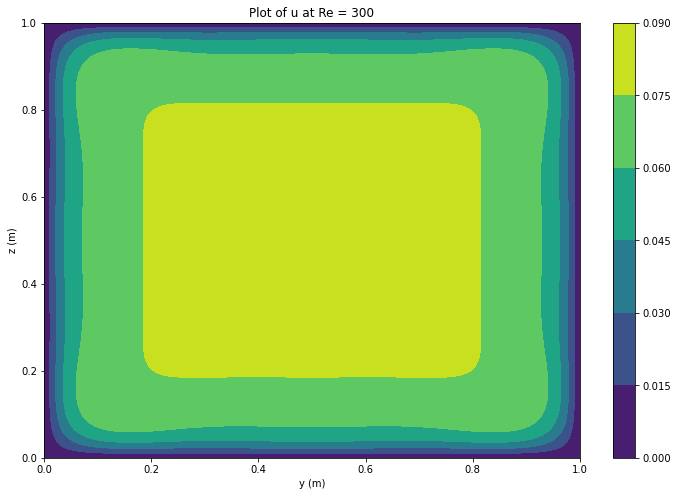

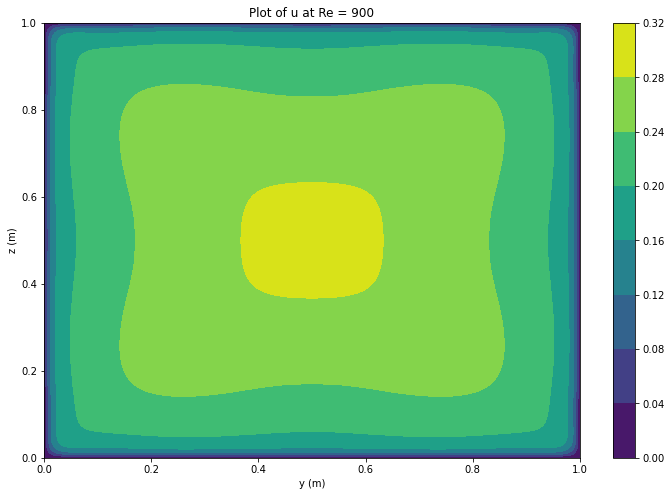

In [53]:
def read_yz_sections(fpath):
    df = pd.read_csv(fpath, delimiter=' ').reset_index()
    df.columns = ['y'] + list(df.iloc[0][1:])
    df = df.drop([0, 1], axis=0).reset_index(drop=True).astype('float')
    return df


for Re in Re_numbers:
    section_data_fpath = f'DuctFlow/YZsections/Re{Re}/DuctFlow_Re{Re}_YZ.dat'
    u_tau = Re * 1.48e-5
    section_data = read_yz_sections(section_data_fpath)
    plt.figure(figsize=figure_size)
    plt.tricontourf(section_data['y'], section_data['z'], section_data["<u>"]*u_tau) 
    plt.xlabel('y (m)')
    plt.ylabel('z (m)')
    plt.title(f"Plot of u at Re = {Re}")
    plt.colorbar()


## Profiles

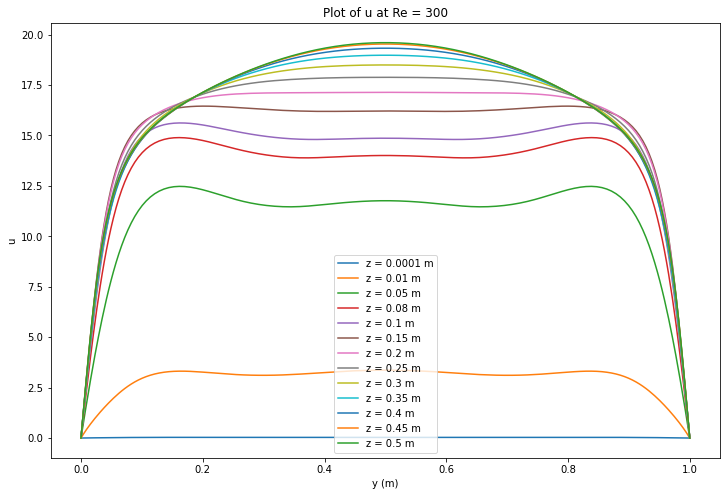

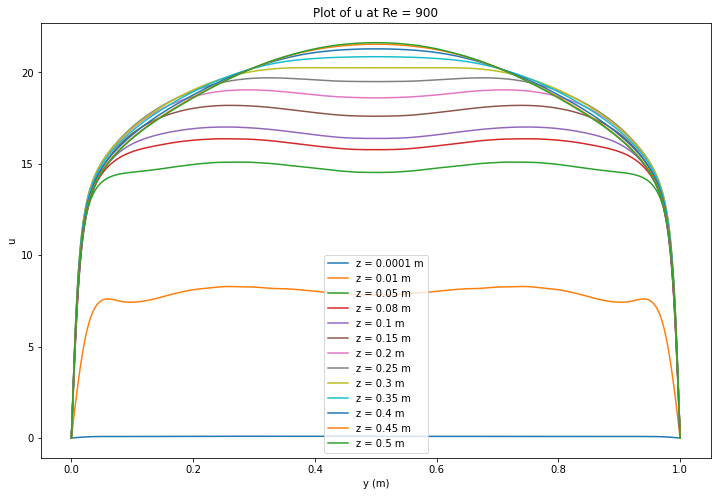

In [54]:
def read_profile_data(fpath):
    df = pd.read_csv(fpath, delimiter=' ', header=None)
    columns = df.iloc[0].dropna().values[1:]
    df = df.iloc[2:].dropna(axis=1)
    df.columns = columns
    df = df.astype(float)
    return df


for Re in Re_numbers:
    profile_dir = f'DuctFlow/profiles/Re{Re}/'
    profile_fpaths = [profile_dir + file_dir for file_dir in os.listdir(profile_dir)]
    profile_fpaths.sort()
    u_tau = Re * 1.48e-5

    plt.figure(figsize=figure_size)
    for file in profile_fpaths:
        profile_data = read_profile_data(file)
        plt.plot(profile_data['y'].values, profile_data["<u>"].values, label=f'z = {profile_data["z"].values[0]} m')

    plt.ylabel("u")
    plt.xlabel('y (m)')
    plt.title(f"Plot of u at Re = {Re}")
    plt.legend()


In [55]:
# # check velocity from section data agrees with plot from profiles

# section_zs = section_data.z.unique()

# plt.figure(figsize=figure_size)

# for z in section_zs[:len(section_zs)//2:7]:
#     data = section_data[section_data['z'] == z]
#     plt.plot(data['y'].values, data[param_to_plot].values, label=f'z = {data["z"].values[0]} m')
    
# plt.legend()
# plt.ylabel(param_to_plot[1:-1])
# plt.xlabel('y (m)')
# plt.title(f"Plot of {param_to_plot[1:-1]} at Re = {Re}")
